# Homework 2: Playing with the Python ecosystem 

Foundations of Science by C. Rummel, 2022-10-13 


In [1]:
from IPython.display import IFrame
IFrame('./HI-1_WS22-23_FoS_HW2.pdf', width=900, height=800)  # png must be located in same directory


data downloaded from http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights
(SOCR Data - 1035 Records of Heights (in) and Weights (lbs) of Major League Baseball Players) 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


ModuleNotFoundError: No module named 'numpy'

In [ ]:
players = pd.read_csv('./BaseballPlayers.csv', index_col=0, delimiter=',')
players


,Team,Position,Height(inches),Weight(pounds),Age
Name,,,,,
Adam_Donachie,BAL,Catcher,74,180.0,22.99
Paul_Bako,BAL,Catcher,74,215.0,34.69
Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...
Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19


In [ ]:
# add columns with height in cm and weight in kg

players['Height(cm)'] = players['Height(inches)'] * 2.54
players['Weight(kg)'] = players['Weight(pounds)'] / 2.20462262


In [ ]:
players.describe()


,Height(inches),Weight(pounds),Age,Height(cm),Weight(kg)
count,1034.000000,1033.000000,1034.000000,1034.000000,1033.000000
mean,73.697292,201.689255,28.736712,187.191122,91.484707
std,2.305818,20.991491,4.320310,5.856779,9.521580
min,67.000000,150.000000,20.900000,170.180000,68.038856
25%,72.000000,187.000000,25.440000,182.880000,84.821773
50%,74.000000,200.000000,27.925000,187.960000,90.718474
75%,75.000000,215.000000,31.232500,190.500000,97.522360
max,83.000000,290.000000,48.520000,210.820000,131.541787


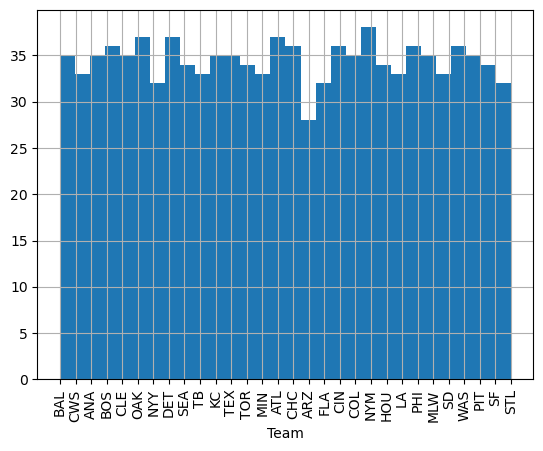

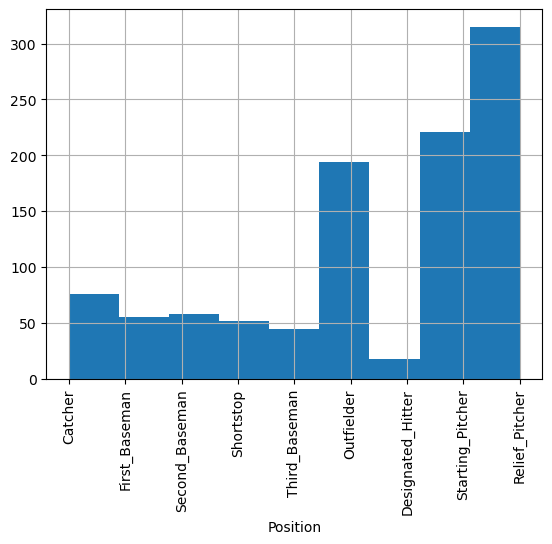

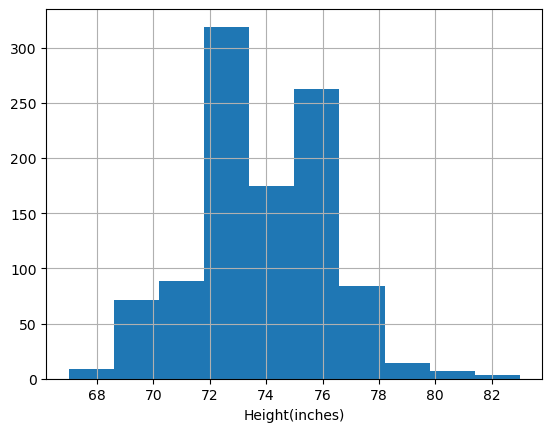

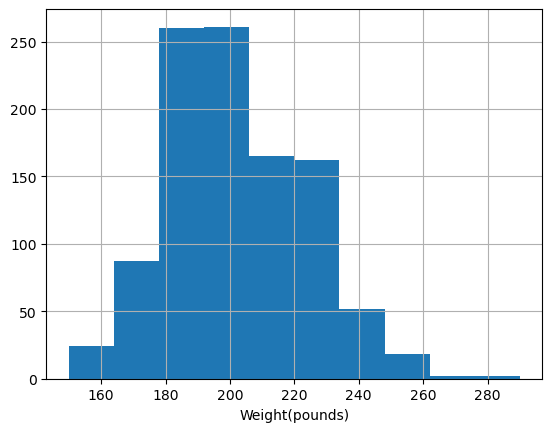

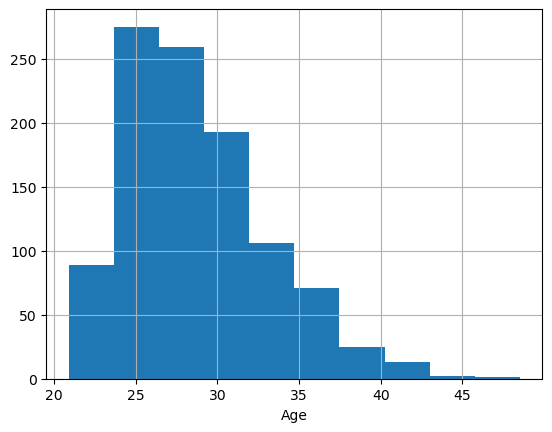

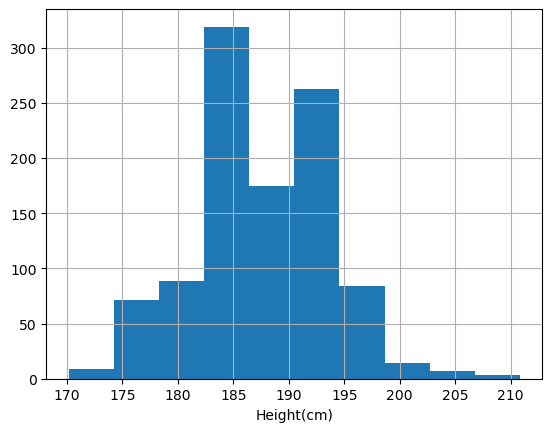

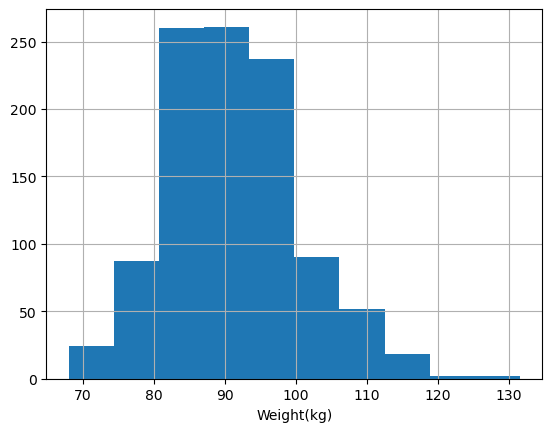

In [ ]:
# orient yourself in the data by plotting histograms column-wise

for i, c in enumerate(players.columns[:2]):
    fig, ax = plt.subplots(1, 1)
    players[c].hist(bins=len(set(players[c])), xrot=90)
    ax.set_xlabel(c)
    
for i, c in enumerate(players.columns[2:]):
    fig, ax = plt.subplots(1, 1)
    players[c].hist()
    ax.set_xlabel(c)
        

In [ ]:
def plot_binned_stats(df, col1, bins, col2):
    '''
    select two columns from DataFrame and bin one 
    calculate and display mean of the other (red full)
    also displayed are standard error of the mean (red dotted) 
    and standard deviation (blue dotted)
    '''
    counts = np.ones_like(bins) * np.nan
    means  = counts.copy()
    stds   = counts.copy()

    for idx, bin_ in enumerate(bins):
        sel = (df[col1] < bin_)
        if idx > 0:
            sel2 = (df[col1] >= bins[idx-1])
            sel = sel & sel2

        counts[idx] = sel.sum(axis=0)
        means[idx]  = df[col2][sel].mean()
        stds[idx]   = df[col2][sel].std()

    fig, ax = plt.subplots(1, 1)

    ax.plot(bins, means, linestyle='-', color='r')
    ax.plot(bins, means+stds/np.sqrt(counts), linestyle=':', color='r')
    ax.plot(bins, means-stds/np.sqrt(counts), linestyle=':', color='r')
    ax.plot(bins, means+stds, linestyle=':', color='b')
    ax.plot(bins, means-stds, linestyle=':', color='b')
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    

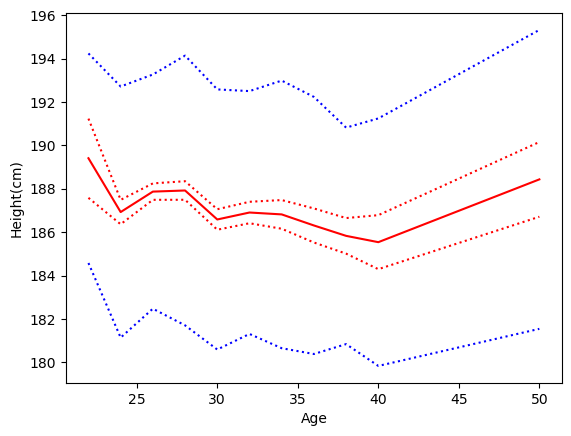

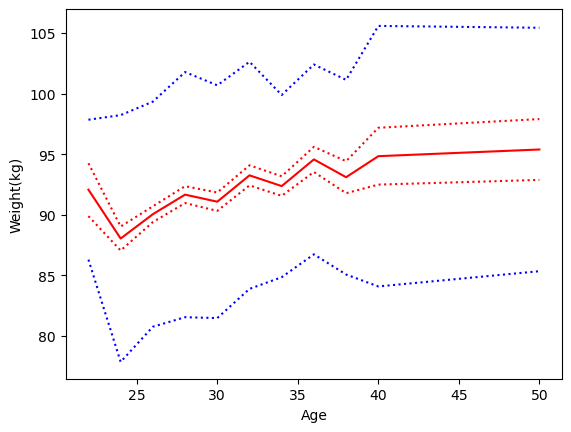

In [ ]:
# bin into age groups of width 2 years and display mean +- std for height and weight

ages = [22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 50]

plot_binned_stats(players, 'Age', ages, 'Height(cm)')
plot_binned_stats(players, 'Age', ages, 'Weight(kg)')


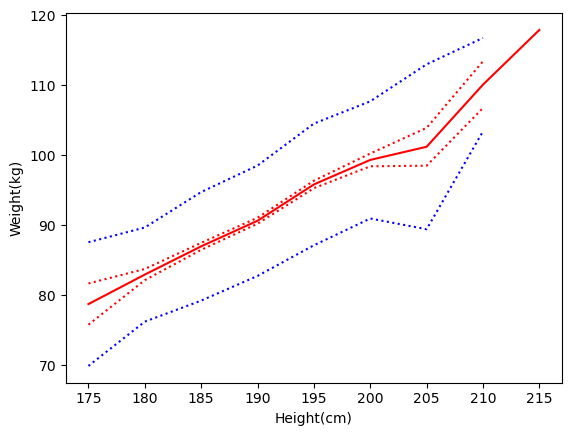

In [ ]:
# bin into height groups of width 5 cm and display mean +- std for weight

heights = [175, 180, 185, 190, 195, 200, 205, 210, 215]

plot_binned_stats(players, 'Height(cm)', heights, 'Weight(kg)')


In [ ]:
def plot_categorial_stats(df, col_cat, col_cont, ylim):
    '''
    select two columns from DataFrame, one categorial and one contineous 
    calculate and display mean of the contineous one (red full)
    also displayed are standard error of the mean (red dotted) 
    and standard deviation (blue dotted)
    '''
    cats = sorted(set(df[col_cat]))
    
    counts = np.ones(len(cats)) * np.nan
    means  = counts.copy()
    stds   = counts.copy()

    for idx, cat in enumerate(cats):
        sel = (df[col_cat] == cat)

        counts[idx] = sel.sum(axis=0)
        means[idx]  = df[col_cont][sel].mean()
        stds[idx]   = df[col_cont][sel].std()

    fig, ax = plt.subplots(1, 1)
    ax.bar(list(range(len(cats))), means, yerr=stds)

    ax.set_xlabel(col_cat)
    ax.set_xticks(range(len(cats)))
    ax.set_xticklabels(cats, rotation=90)
    
    ax.set_ylabel(col_cont)
    ax.set_ylim(ylim)
    

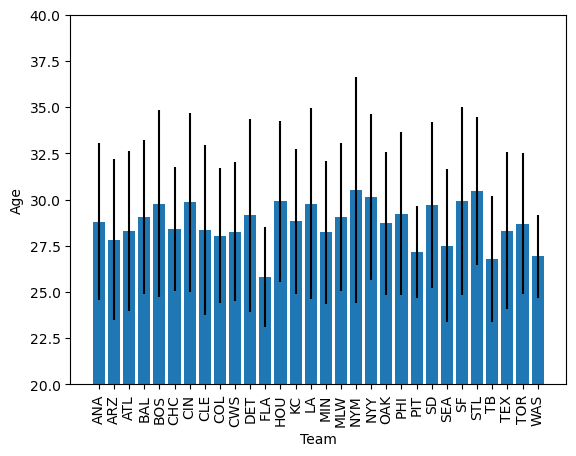

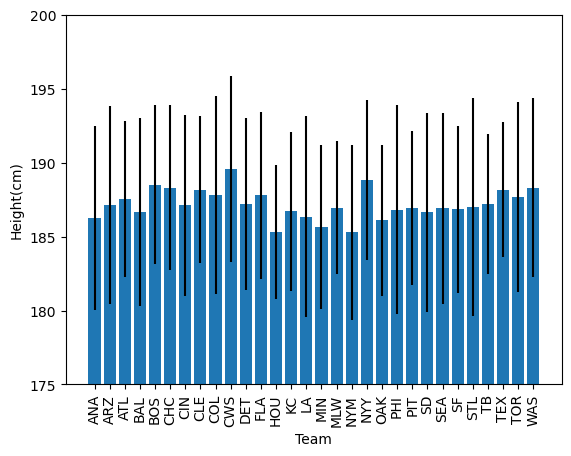

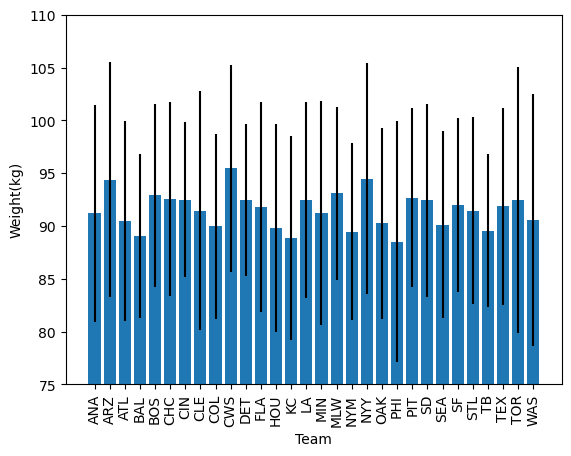

In [ ]:
# compare age, height and weight by team

plot_categorial_stats(players, 'Team', 'Age', (20, 40))
plot_categorial_stats(players, 'Team', 'Height(cm)', (175, 200))
plot_categorial_stats(players, 'Team', 'Weight(kg)', (75, 110))


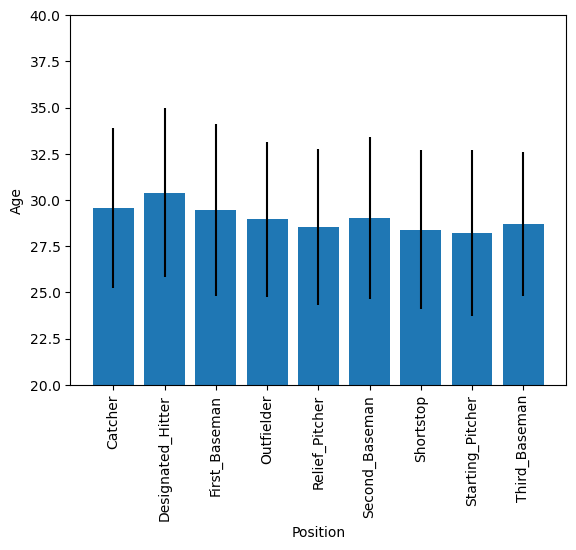

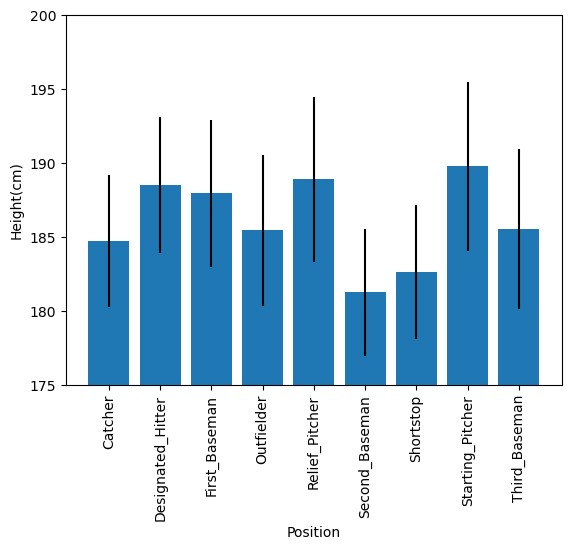

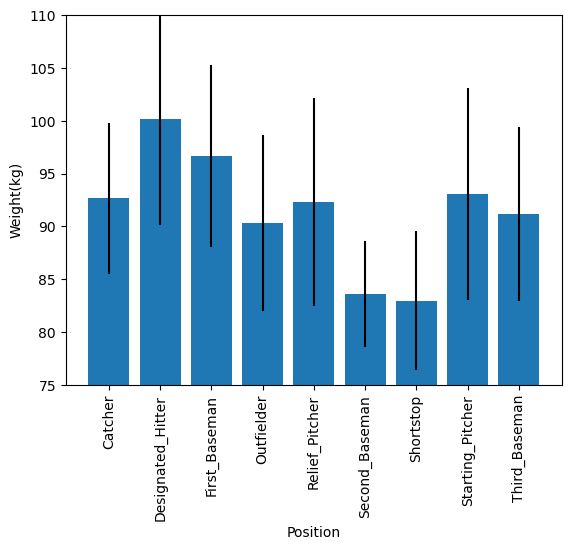

In [ ]:
# compare age, height and weight by position

plot_categorial_stats(players, 'Position', 'Age', (20, 40))
plot_categorial_stats(players, 'Position', 'Height(cm)', (175, 200))
plot_categorial_stats(players, 'Position', 'Weight(kg)', (75, 110))
